# UTS Machine Learning
# Segmentasi Gambar dengan Clustering

### M. Rafy Shah Pahlevi
### 2141720244
### TI-3E - 19

In [92]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

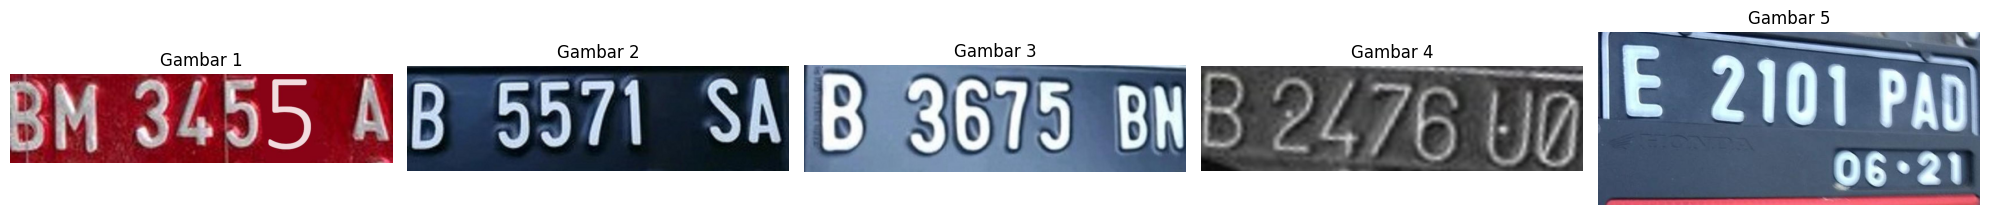

In [93]:
# Daftar nama file gambar
image_files = ['img/plat1.jpg', 'img/plat2.jpg', 'img/plat3.jpg', 'img/plat4.jpg', 'img/plat5.jpg']

# Membuat subplots
fig, axes = plt.subplots(1, len(image_files), figsize=(20, 4))
axes = axes.ravel()

# Iterasi melalui setiap file gambar
for i, file in enumerate(image_files):
    # Load Gambar
    img = cv2.imread(file)
    
    # Menampilkan gambar pada subplot
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Gambar {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [94]:
# Iterasi melalui setiap file gambar
for file in image_files:
    # Load Gambar
    img = cv2.imread(file)
    
    # Mendapatkan dimensi gambar
    h, w, ch = img.shape
    
    # Menampilkan dimensi gambar
    print(f"Dimensi Gambar {file} :")
    print("Height :", h)
    print("Width :", w)
    print("Channel :", ch)

Dimensi Gambar img/plat1.jpg :
Height : 258
Width : 1101
Channel : 3
Dimensi Gambar img/plat2.jpg :
Height : 359
Width : 1297
Channel : 3
Dimensi Gambar img/plat3.jpg :
Height : 343
Width : 1233
Channel : 3
Dimensi Gambar img/plat4.jpg :
Height : 321
Width : 1163
Channel : 3
Dimensi Gambar img/plat5.jpg :
Height : 303
Width : 670
Channel : 3


In [95]:
# Membagi daftar gambar menjadi kelompok 5 gambar
for j, img_path in enumerate(image_files):
        img = cv2.imread(img_path)
        h, w, ch = img.shape

        data = img / 255.0
        data = data.reshape(h * w, ch)

        print(f"Shape data dari gambar ke-{j+1}: {data.shape}")


Shape data dari gambar ke-1: (284058, 3)
Shape data dari gambar ke-2: (465623, 3)
Shape data dari gambar ke-3: (422919, 3)
Shape data dari gambar ke-4: (373323, 3)
Shape data dari gambar ke-5: (203010, 3)


In [96]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

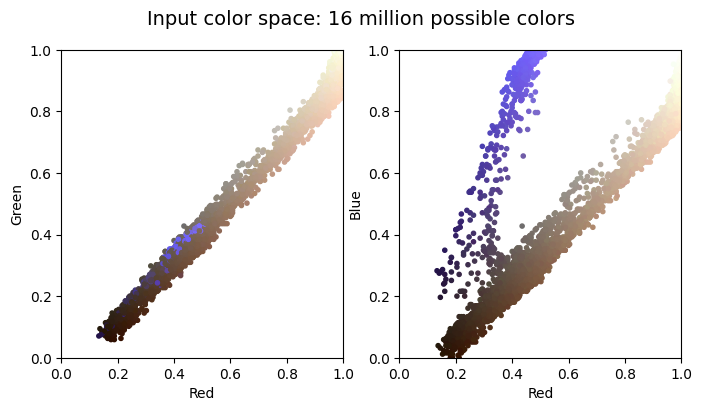

In [97]:
plot_pixels(data, title='Input color space: 16 million possible colors')

C:\Users\Rafysp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


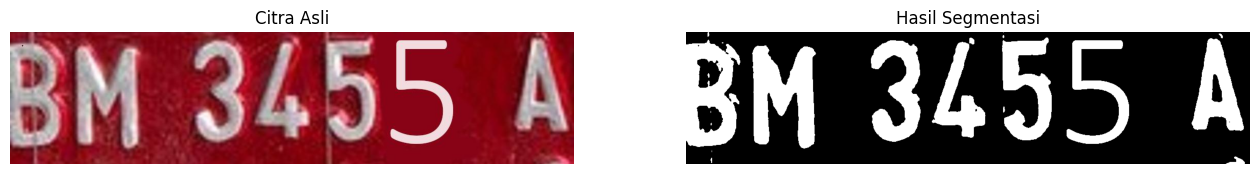

C:\Users\Rafysp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


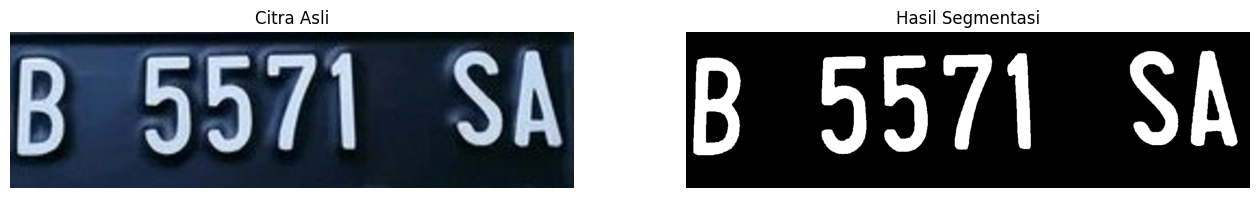

C:\Users\Rafysp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


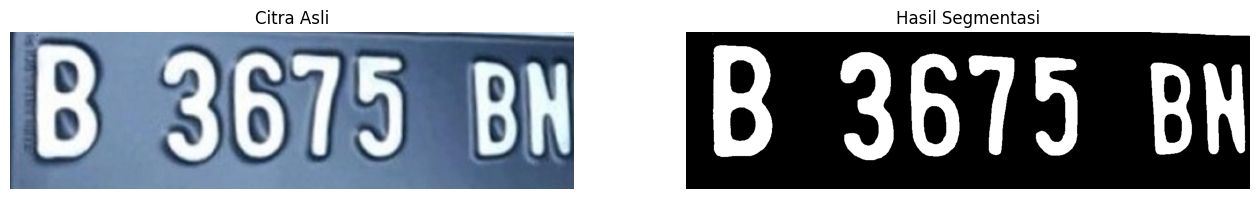

C:\Users\Rafysp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


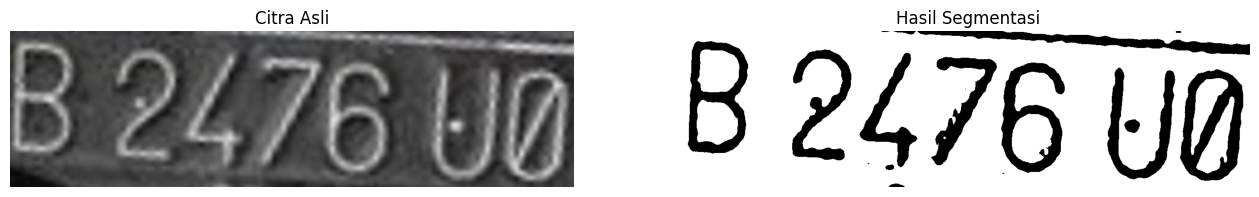

C:\Users\Rafysp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


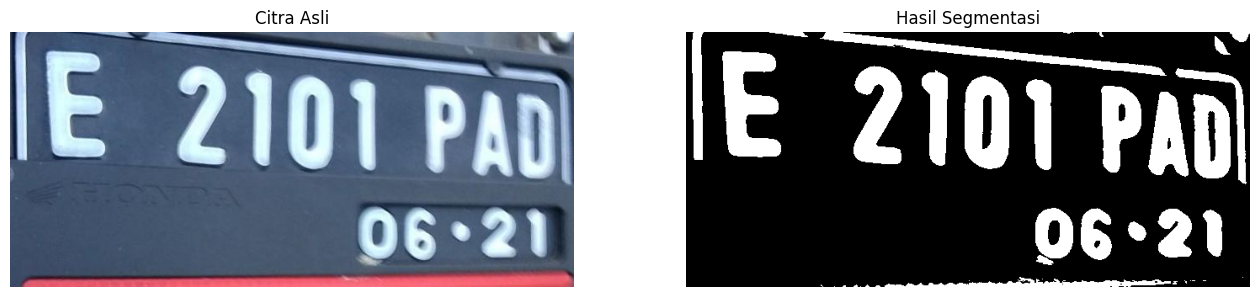

In [98]:
from sklearn.cluster import KMeans

# Iterasi melalui setiap file gambar
for j, img_path in enumerate(image_files):
    img = cv2.imread(img_path)
    h, w, ch = img.shape

    data = img / 255.0
    data = data.reshape(h * w, ch)

    # Lakukan segmentasi pada gambar dengan K-Means
    k = 2  # Jumlah cluster yang diinginkan
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    # Dapatkan label cluster untuk setiap piksel
    labels = kmeans.labels_

    # Reshape label menjadi bentuk asli gambar
    segmented_img = labels.reshape(h, w)

    # Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_img, cmap='gray')
    plt.title('Hasil Segmentasi')
    plt.axis('off')

    plt.show()